In [1]:
import numpy as np
import pandas as pd
import talib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
df = pd.read_csv('~/Desktop/EURUSD_M5_201401012300_201804301655.csv', 
                 parse_dates=True,sep='\t')
df.head()

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
0,2014.01.01,23:00:00,1.37550,1.37552,1.37520,1.37533,134,0,101
1,2014.01.01,23:05:00,1.37532,1.37581,1.37517,1.37517,266,0,70
2,2014.01.01,23:10:00,1.37517,1.37574,1.37372,1.37467,524,0,35
3,2014.01.01,23:15:00,1.37464,1.37499,1.37448,1.37496,114,0,70
4,2014.01.01,23:20:00,1.37496,1.37592,1.37482,1.37488,86,0,92


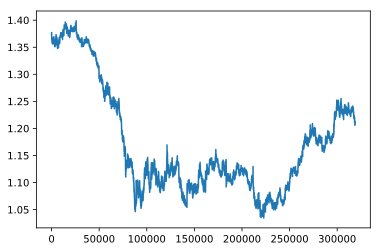

In [3]:
df['<CLOSE>'].plot()

In [4]:
df['DATETIME'] = df['<DATE>'].map(lambda date: '-'.join(date.split('.'))) + ' ' + df['<TIME>']
df['DATETIME'] = pd.to_datetime(df['DATETIME'])
df.index = df['DATETIME']
df = df.drop(['DATETIME','<DATE>', '<TIME>'], axis = 1)
df.head()

,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
DATETIME,,,,,,,
2014-01-01 23:00:00,1.37550,1.37552,1.37520,1.37533,134,0,101
2014-01-01 23:05:00,1.37532,1.37581,1.37517,1.37517,266,0,70
2014-01-01 23:10:00,1.37517,1.37574,1.37372,1.37467,524,0,35
2014-01-01 23:15:00,1.37464,1.37499,1.37448,1.37496,114,0,70
2014-01-01 23:20:00,1.37496,1.37592,1.37482,1.37488,86,0,92


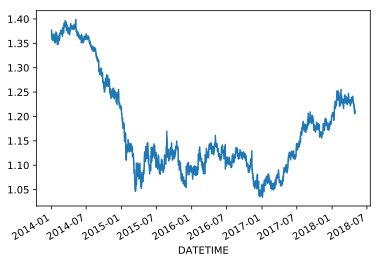

In [5]:
df['<CLOSE>'].plot()

In [6]:
df['<SPREAD>'].describe()

count    318871.000000
mean          8.558997
std          10.031394
min           0.000000
25%           4.000000
50%           7.000000
75%           9.000000
max         198.000000
Name: <SPREAD>, dtype: float64

In [7]:
ema20 = talib.EMA(df['<CLOSE>'],timeperiod=20)

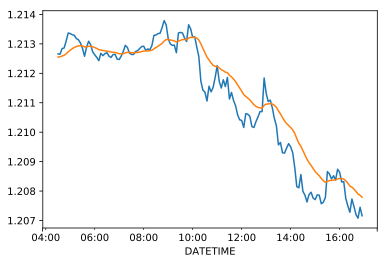

In [8]:
df[-150:]['<CLOSE>'].plot()
ema20[-150:].plot()

In [9]:
# fastperiod= 12, slowperiod= 26, signalperiod= 9 default
macd, macdsignal, macdhist = talib.MACD(df['<CLOSE>'])

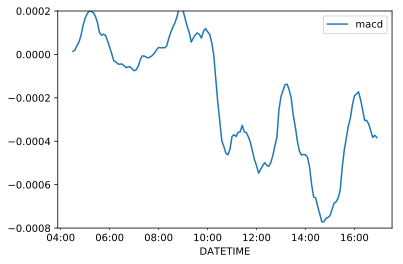

In [10]:
macd[-150:].plot()
# macdsignal[-150:].plot()
# macdhist[-150:].plot()
plt.xticks([])
plt.ylim((-0.0008,0.0002))
plt.legend(['macd','macdsignal','macdhist'])

In [11]:
macd_change_pos = (macd > 0) & (macd.shift(1) < 0)

In [12]:
macd_change_pos[-150:][macd_change_pos==True]

DATETIME
2018-04-30 07:50:00    True
dtype: bool

In [13]:
macd_change_neg = (macd < 0) & (macd.shift(1) > 0)

In [14]:
macd_change_neg[-150:][macd_change_neg==True]

DATETIME
2018-04-30 06:10:00    True
2018-04-30 10:15:00    True
dtype: bool

In [15]:
ema20_minus_price = ema20 - df['<CLOSE>']
cross_down_ema20 = (ema20_minus_price > 0) & (ema20_minus_price.shift(1) < 0)
cross_up_ema20 = (ema20_minus_price < 0) & (ema20_minus_price.shift(1) > 0)

In [16]:
cross_up_ema20[-50:][cross_up_ema20==True]

DATETIME
2018-04-30 12:55:00    True
2018-04-30 15:30:00    True
dtype: bool

In [17]:
cross_down_ema20[-50:][cross_down_ema20==True]

DATETIME
2018-04-30 13:15:00    True
2018-04-30 16:05:00    True
dtype: bool

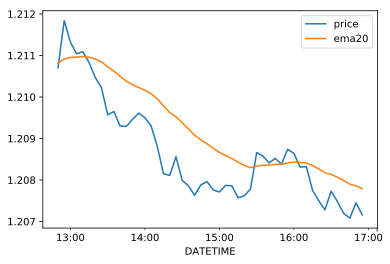

In [18]:
df[-50:]['<CLOSE>'].plot()
ema20[-50:].plot()
plt.legend(['price','ema20'])

In [47]:
df['1A'] = df['<CLOSE>'].shift(-1) - df['<CLOSE>']
df['2A'] = df['<CLOSE>'].shift(-2) - df['<CLOSE>']
df['3A'] = df['<CLOSE>'].shift(-3) - df['<CLOSE>']
df['4A'] = df['<CLOSE>'].shift(-4) - df['<CLOSE>']
df['5A'] = df['<CLOSE>'].shift(-5) - df['<CLOSE>']

df['6A'] = df['<CLOSE>'].shift(-6) - df['<CLOSE>']
df['7A'] = df['<CLOSE>'].shift(-7) - df['<CLOSE>']
df['8A'] = df['<CLOSE>'].shift(-8) - df['<CLOSE>']
df['9A'] = df['<CLOSE>'].shift(-9) - df['<CLOSE>']
df['10A'] = df['<CLOSE>'].shift(-10) - df['<CLOSE>']
df['11A'] = df['<CLOSE>'].shift(-11) - df['<CLOSE>']
df['12A'] = df['<CLOSE>'].shift(-12) - df['<CLOSE>']
df['13A'] = df['<CLOSE>'].shift(-13) - df['<CLOSE>']
df['14A'] = df['<CLOSE>'].shift(-14) - df['<CLOSE>']

df['15A'] = df['<CLOSE>'].shift(-15) - df['<CLOSE>']
df['20A'] = df['<CLOSE>'].shift(-20) - df['<CLOSE>']
df['25A'] = df['<CLOSE>'].shift(-25) - df['<CLOSE>']
df['30A'] = df['<CLOSE>'].shift(-30) - df['<CLOSE>']
df['35A'] = df['<CLOSE>'].shift(-35) - df['<CLOSE>']
df['40A'] = df['<CLOSE>'].shift(-40) - df['<CLOSE>']
df['45A'] = df['<CLOSE>'].shift(-45) - df['<CLOSE>']

In [48]:
cross_up_ema20_data = df[cross_up_ema20]
cross_down_ema20_data = df[cross_down_ema20]
macd_change_pos_data = df[macd_change_pos]
macd_change_neg_data = df[macd_change_neg]

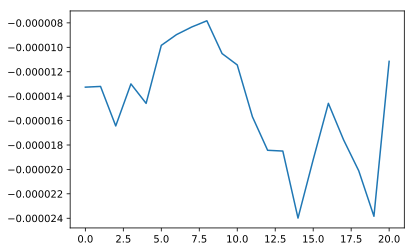

In [49]:
plt.plot(np.array([
    cross_up_ema20_data['1A'].mean(),
    cross_up_ema20_data['2A'].mean(),
    cross_up_ema20_data['3A'].mean(),
    cross_up_ema20_data['4A'].mean(),
    cross_up_ema20_data['5A'].mean(),

    cross_up_ema20_data['6A'].mean(),
    cross_up_ema20_data['7A'].mean(),
    cross_up_ema20_data['8A'].mean(),
    cross_up_ema20_data['9A'].mean(),
    cross_up_ema20_data['10A'].mean(),
    cross_up_ema20_data['11A'].mean(),
    cross_up_ema20_data['12A'].mean(),
    cross_up_ema20_data['13A'].mean(),
    cross_up_ema20_data['14A'].mean(),
    
    cross_up_ema20_data['15A'].mean(),
    cross_up_ema20_data['20A'].mean(),
    cross_up_ema20_data['25A'].mean(),
    cross_up_ema20_data['30A'].mean(),
    cross_up_ema20_data['35A'].mean(),
    cross_up_ema20_data['40A'].mean(),
    cross_up_ema20_data['45A'].mean(),
]))

In [41]:
cross_up_ema20_data.tail()

,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>,5A,10A,15A,20A,25A,30A,35A,40A,45A,1A,2A,3A,4A
DATETIME,,,,,,,,,,,,,,,,,,,,
2018-04-30 09:50:00,1.21306,1.21379,1.21284,1.21365,886,0,0,-0.00108,-0.00209,-0.00192,-0.00252,-0.00323,-0.00311,-0.00295,-0.00256,-0.00400,1.21351,-0.00043,-0.00041,-0.00076
2018-04-30 10:05:00,1.21323,1.21336,1.21290,1.21324,854,0,0,-0.00188,-0.00138,-0.00169,-0.00234,-0.00261,-0.00288,-0.00192,-0.00302,-0.00378,1.21289,-0.00067,-0.00151,-0.00181
2018-04-30 11:00:00,1.21184,1.21232,1.21164,1.21226,727,0,0,-0.00040,-0.00167,-0.00165,-0.00174,-0.00122,-0.00269,-0.00265,-0.00415,-0.00438,1.21173,-0.00076,-0.00048,-0.00071
2018-04-30 12:55:00,1.21069,1.21214,1.21045,1.21184,1057,0,0,-0.00137,-0.00255,-0.00304,-0.00398,-0.00413,-0.00406,-0.00346,-0.00409,-0.00464,1.21132,-0.00080,-0.00075,-0.00101
2018-04-30 15:30:00,1.20778,1.20868,1.20776,1.20866,957,0,0,0.00008,-0.00116,-0.00158,NaN,NaN,NaN,NaN,NaN,NaN,1.20858,-0.00025,-0.00014,-0.00028


In [37]:
(df['<CLOSE>'].shift(-1)-df['<CLOSE>']).head()

DATETIME
2014-01-01 23:00:00   -0.00016
2014-01-01 23:05:00   -0.00050
2014-01-01 23:10:00    0.00029
2014-01-01 23:15:00   -0.00008
2014-01-01 23:20:00    0.00007
Name: <CLOSE>, dtype: float64

In [36]:
df['<CLOSE>'].head()

DATETIME
2014-01-01 23:00:00    1.37533
2014-01-01 23:05:00    1.37517
2014-01-01 23:10:00    1.37467
2014-01-01 23:15:00    1.37496
2014-01-01 23:20:00    1.37488
Name: <CLOSE>, dtype: float64

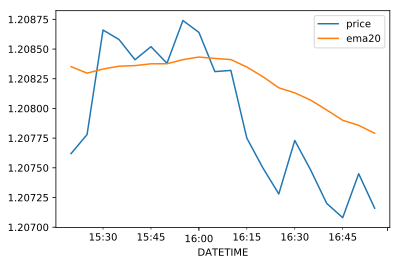

In [43]:
df[-20:]['<CLOSE>'].plot()
ema20[-20:].plot()
plt.legend(['price','ema20'])